<a href="https://colab.research.google.com/github/dev02chandan/Neural-Jewels/blob/main/Creation_of_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

! mkdir ~/.kaggle

! cp /content/drive/MyDrive/Diamond_Ring_Project/Keys/kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shyambhu/hands-and-palm-images-dataset

 97% 615M/634M [00:04<00:00, 161MB/s]
100% 634M/634M [00:05<00:00, 133MB/s]


In [ ]:
!unzip /content/hands-and-palm-images-dataset.zip

## Removing unwanted images

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

temp = pd.read_csv('/content/HandInfo.csv')

dataset_path = '/content/Hands/Hands'

In [ ]:
aspects = temp['aspectOfHand'].unique()

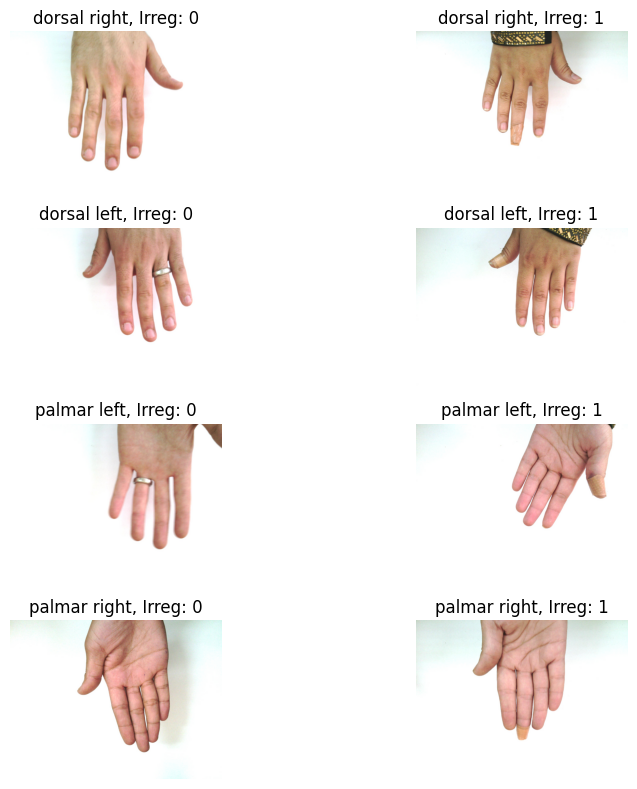

In [ ]:
# Adjust the figure size as needed to accommodate the subplots
plt.figure(figsize=(10, 8))

# Counter for subplot index
subplot_idx = 1

# Iterate through each aspect and irregularity combination
for aspect in aspects:
    for irregularity in [0, 1]:
        filtered_df = temp[(temp['aspectOfHand'] == aspect) & (temp['irregularities'] == irregularity)]

        if not filtered_df.empty:
            # Assuming the first image is representative
            image_name = filtered_df.iloc[0]['imageName']
            image_path = os.path.join(dataset_path, image_name)

            # Load and plot the image
            img = plt.imread(image_path)
            plt.subplot(len(aspects), 2, subplot_idx)  # nrows, ncols, index
            plt.imshow(img)
            plt.title(f"{aspect}, Irreg: {irregularity}")
            plt.axis('off')

            # Increment subplot index
            subplot_idx += 1

plt.tight_layout()
plt.show()

We will remove the ones, already wearing a ring, and palmar images.

In [ ]:
temp2 = temp[temp['accessories'] == 0]

In [ ]:
df = temp2[temp2['aspectOfHand'].isin(['dorsal right', 'dorsal left'])]

In [ ]:
len(df)

3873

In [ ]:
df.head()

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0


In [ ]:
import shutil  # For moving files

# Directory where images without rings will be stored
new_directory_path = 'new_data'
os.makedirs(new_directory_path, exist_ok=True)

for _, row in df.iterrows():
    source_path = os.path.join(dataset_path, row['imageName'])
    destination_path = os.path.join(new_directory_path, row['imageName'])

    # Move the file
    shutil.move(source_path, destination_path)

## EDA

In [ ]:
image_dir = '/content/new_data'

In [ ]:
df

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0
...,...,...,...,...,...,...,...,...,...
11057,1589,22,female,fair,0,1,dorsal left,Hand_0011724.jpg,0
11058,1589,22,female,fair,0,1,dorsal left,Hand_0011725.jpg,0
11059,1589,22,female,fair,0,1,dorsal left,Hand_0011726.jpg,0
11060,1589,22,female,fair,0,1,dorsal left,Hand_0011727.jpg,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 11061
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3873 non-null   int64 
 1   age             3873 non-null   int64 
 2   gender          3873 non-null   object
 3   skinColor       3873 non-null   object
 4   accessories     3873 non-null   int64 
 5   nailPolish      3873 non-null   int64 
 6   aspectOfHand    3873 non-null   object
 7   imageName       3873 non-null   object
 8   irregularities  3873 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 302.6+ KB


In [ ]:
df.describe()

,id,age,accessories,nailPolish,irregularities
count,3.873000e+03,3873.000000,3873.0,3873.000000,3873.000000
mean,2.240657e+05,23.098115,0.0,0.093726,0.024012
std,1.150187e+06,8.591491,0.0,0.291484,0.153107
min,0.000000e+00,18.000000,0.0,0.000000,0.000000
25%,5.880000e+02,21.000000,0.0,0.000000,0.000000
50%,1.059000e+03,21.000000,0.0,0.000000,0.000000
75%,1.540000e+03,22.000000,0.0,0.000000,0.000000
max,9.000000e+06,75.000000,0.0,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

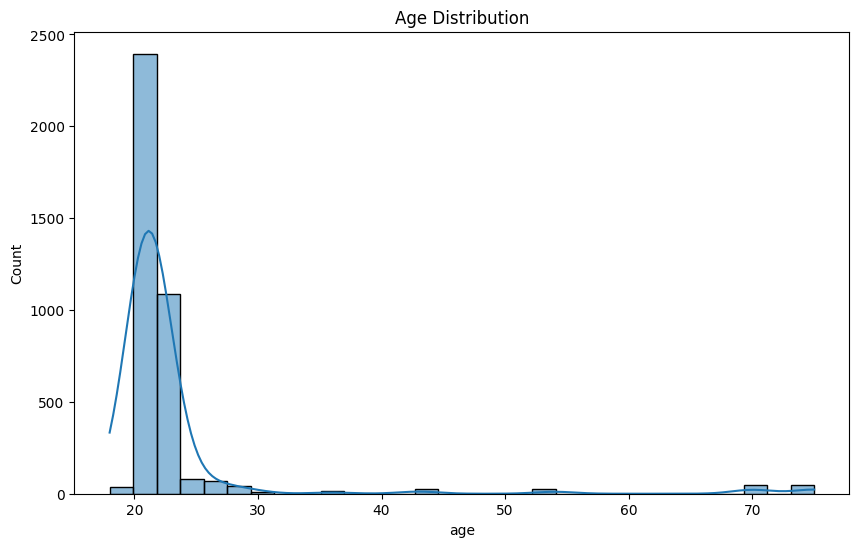

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

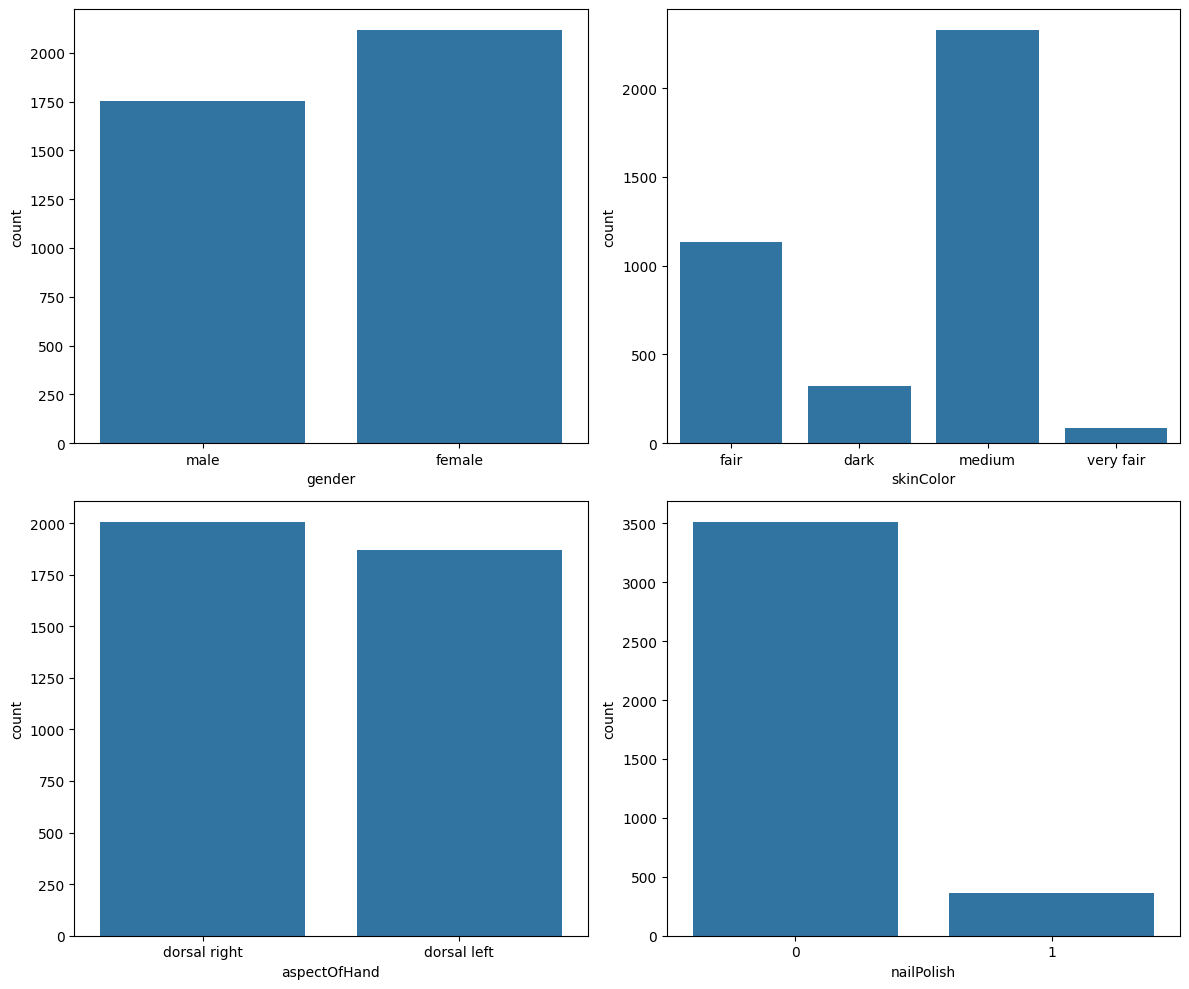

In [ ]:

# Distribution of categorical features
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(data=df, x='gender', ax=axs[0, 0])
sns.countplot(data=df, x='skinColor', ax=axs[0, 1])
sns.countplot(data=df, x='aspectOfHand', ax=axs[1, 0])
sns.countplot(data=df, x='nailPolish', ax=axs[1, 1])

plt.tight_layout()
plt.show()


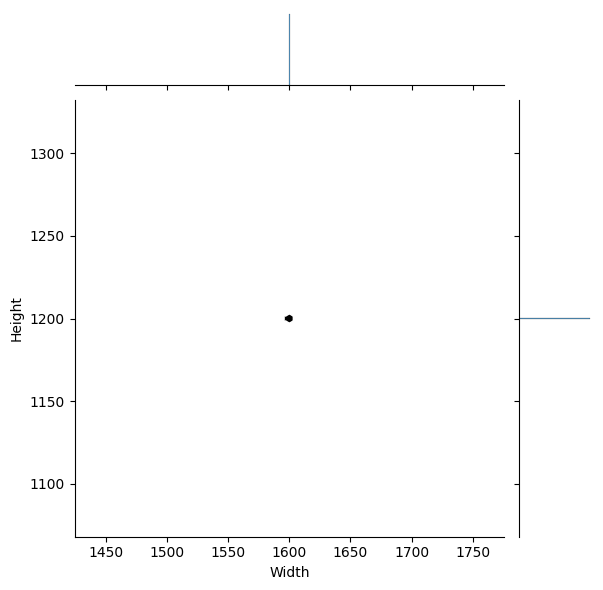

In [ ]:
from PIL import Image

image_sizes = []
for image_name in df['imageName']:
    image_path = os.path.join(image_dir, image_name)
    with Image.open(image_path) as img:
        image_sizes.append(img.size)

# Convert to a DataFrame and plot the distribution of image sizes
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
sns.jointplot(data=image_sizes_df, x='Width', y='Height', kind='hex')
plt.show()
